In [117]:
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Count'>

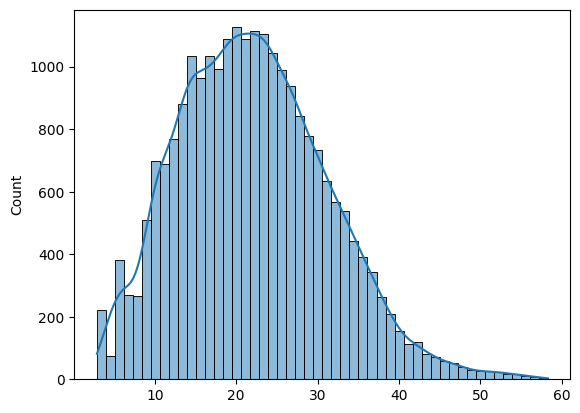

In [118]:
data = sp.io.loadmat('coord1PHP.mat')
protdist = data['protdist'][:,0]
A = data['A']
coord = data['coord']
Nnode = A.shape[0]

sns.histplot(protdist, kde=True, bins=50)

/tmp/ipykernel_833/2899854611.py:2: RuntimeWarning: divide by zero encountered in divide
  sns.heatmap(1./D)


<Axes: >

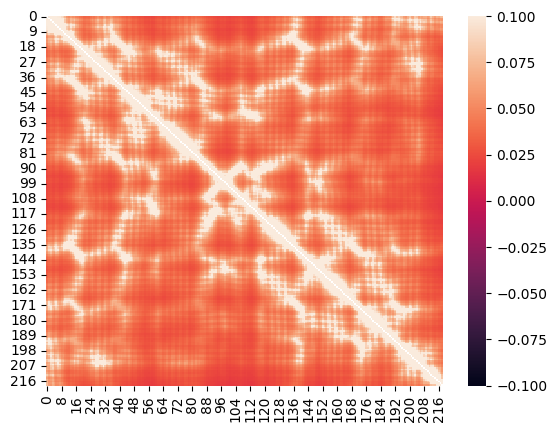

In [119]:
D = sp.spatial.distance.squareform(protdist)
sns.heatmap(1./D)

<Axes: >

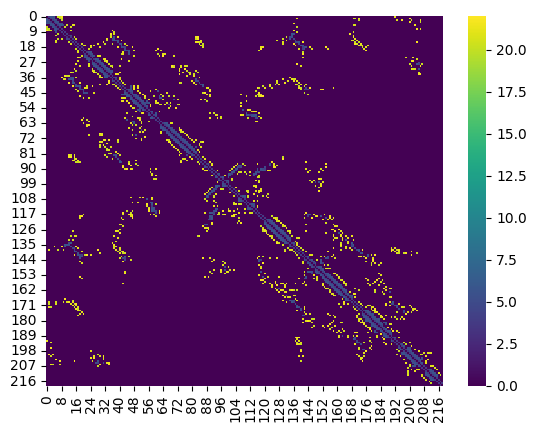

In [120]:
Net6 = (D < 6) * D
Net10 = (D > 10) * (D < 11) * D
N1 = (D < 11) * D
sns.heatmap(Net6 + 2*Net10, cmap='viridis')

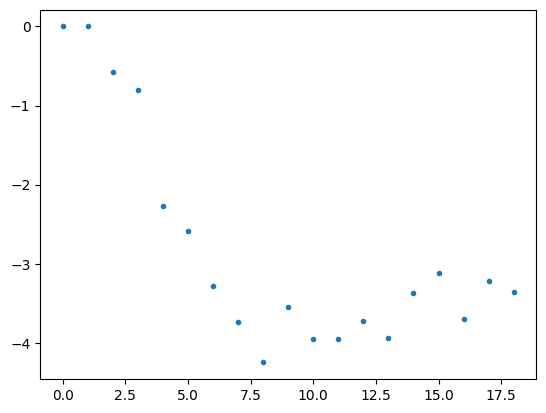

In [121]:
Kdiag = []

for index in range(Nnode):
    Kdiag.append(np.sum(np.diag(A, index))/(Nnode - index))

plt.plot(np.log(Kdiag[1:20]), '.')

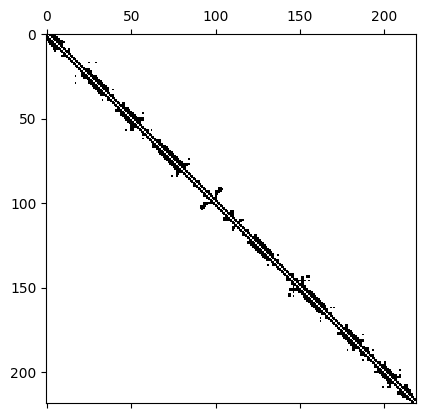

In [122]:
Nkd = 12
Ad = np.zeros((Nnode, Nnode))

for ind in range(-Nkd, Nkd):
    Ad += np.diagflat(A.diagonal(ind), ind)
Ad = Ad + Ad.T
plt.spy(Ad)

<Axes: >

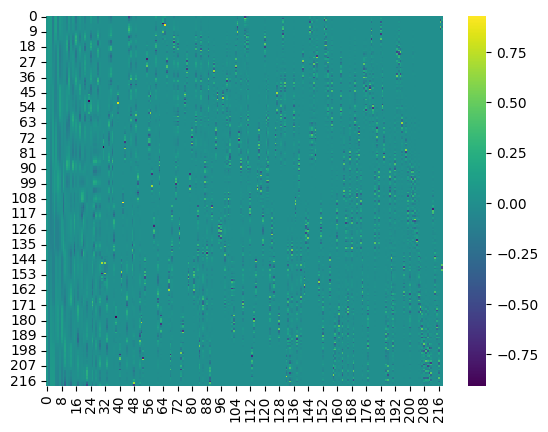

In [123]:
ValAd, VecAd = np.linalg.eig(sp.sparse.csgraph.laplacian(Ad))
sns.heatmap(VecAd, cmap='viridis')

<Axes: >

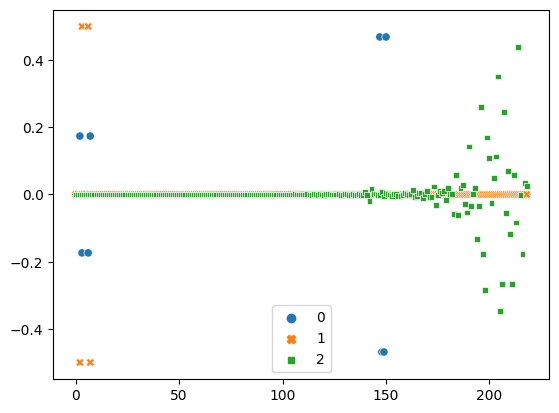

In [124]:
i1 = Nnode - 1
i2 = Nnode - 2
i3 = Nnode - 3
sns.scatterplot(VecAd[:, [i1, i2, i3]])

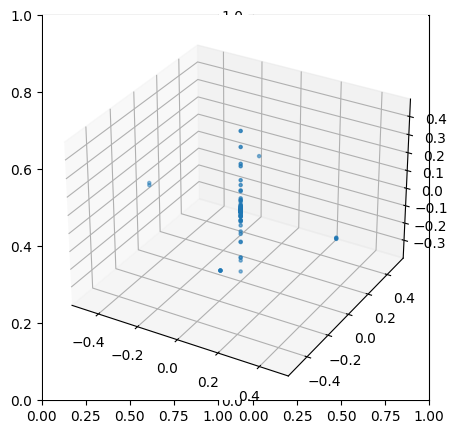

In [142]:
fig, ax = plt.subplots(ncols=2 , figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

ax.scatter(VecAd[:, i1], VecAd[:, i2], VecAd[:, i3], marker='.')

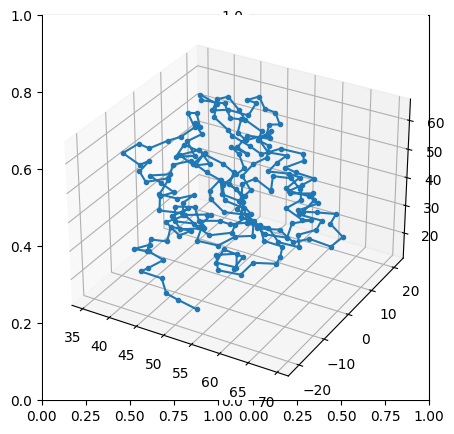

In [143]:
fig, ax = plt.subplots(ncols=2 , figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

ax.plot(coord[:,0], coord[:,1], coord[:,2], marker='.')

In [127]:
import networkx as nx

D, P = sp.sparse.csgraph.dijkstra(Ad, directed=False, return_predecessors=True)
Cl = 1 / np.mean(D)
K = np.sum(A, axis=0)
BC = nx.betweenness_centrality(nx.from_numpy_array(A))

print(Cl)
print(K)
print(BC)

0.029674209219849382
[ 4  6  8  7  9  9  9  6  6  9  8  8 11 14 14 12 13 14 14 13  9 11 10  6
  6  9  8  9 11 11 10 11 11 12  7  8 12 11 12 14 12 12 16 17 16 15 12 11
 16 11 12 11 11  6  6  8 10 14 11  9 11 10 10  9  6  5 10 12  8  7 11 10
  8 10  9  8  9 12  9  7  8  7 12  9  9  8  8 12  9 13 16 14 14 13 10  8
  7  6  8  5  9  7  8  7  9 11  9 10  6  7 14  8  8  7 13 15 14 14 15 16
 14  9  8 12 12  8  8 10 11  8  8 13 10  8 13 11 14 14 11 11 12 14 14 14
 15 11 13  6  9  8  8 14 13 10 14 12 11 10 11 10  9 11 12 10  6  9  5  7
 13  9 12 13 13 17 14  8  8 12 13  8 12 12  9  7  7  7 12  9  6  7 13  8
  8 10 11  6  8 10  8  8 12 11 12 11 12 12  7  7  7  9  6  6  7  8  6  6
  5  3  2]
{0: 0.0, 1: 0.01204099367300543, 2: 0.01401334954164753, 3: 0.0006162970922864942, 4: 0.003207949937519427, 5: 0.004760302926528808, 6: 0.015745067857777278, 7: 0.00021252745606001165, 8: 0.00021175435907414559, 9: 0.018880116457933395, 10: 0.00888257472519769, 11: 0.0023694854983744664, 12: 0.0094880906468599